### Function

In [186]:
def angle_vis(image_datab,image_datar,pa_blue,pa_red,op_angle_blue, op_angle_red,location,blue_direction,red_direction, source, arcs):
    import numpy as np
    import matplotlib.pyplot as plt
    import math
    from spectral_cube import SpectralCube
    import astropy.units as u
    from astropy.utils import data
    from astropy.io import fits
    import  aplpy
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    from astropy.io import fits
    from astropy.wcs import WCS
    from astropy.utils.data import get_pkg_data_filename
    from regions import PixCoord, LineSkyRegion, LinePixelRegion
    import matplotlib.patches as mpatches
    import os
    label=['Radius of 1500 au','Radius of 3000 au','Annulus of 1500 - 3000 au']
    iteration_counter=0
#    fig = plt.figure(figsize=(8,8))
    
    for arcl, pa_blue,pa_red,op_angle_blue,op_angle_red, label, source in zip(arcs, pa_blue,pa_red,op_angle_blue,op_angle_red, label, source):
        iteration_counter +=1
        f = fits.open(image_file_b)
        image_header_b = fits.getheader(image_file_b, ext=0)
        w = WCS(image_header_b)

        sky = SkyCoord(location, unit=(u.hourangle, u.deg))
#        print(sky.ra.deg, sky.dec.deg)
        x_source, y_source = w.world_to_pixel(sky)
#        print(x_source,y_source)
        #Plotting figure
        plt.imshow(image_datar+image_datab,origin='lower',cmap='binary')
        plt.colorbar()
        plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")


        x_label, y_label = 0.02, 0.972  # Adjust these values to position the label
        label_text = source+' '+label
        angle_text = 'PA_B: '+str(int(pa_blue))+'º, OA_B: '+str(int(op_angle_blue))+'º PA_R: '+str(int(pa_red))+'º, OA_R: '+str(int(op_angle_red))+'º.'
        plt.text(x_label, y_label, label_text, color='black', fontsize=9, ha='left', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle="square",ec='black',fill=False, linestyle='-'))
        x_label, y_label = 0.02, 0.03
        plt.text(x_label, y_label, angle_text, color='black', fontsize=8, ha='left', va='bottom', transform=plt.gca().transAxes, bbox=dict(boxstyle="square",ec='black',fill=False, linestyle='-'))


        if blue_direction=='west' and pa_blue>0 :
            pa_blue=pa_blue+180
    
        if red_direction=='west' and pa_red>0:
            pa_red=180+pa_red
    
        angles_b = np.array([pa_blue, pa_blue - op_angle_blue/2., pa_blue + op_angle_blue/2.]) +90.
        angles_r = np.array([pa_red, pa_red - op_angle_red/2., pa_red + op_angle_red/2.]) +90.
    
#        distance=distance_o.to(u.m)
#        arc = arcs.to(u.m)
        length_lines = (206265 * (1.496e+11 * arcl) / (3.086e+16*distance_o))
#        print(length_lines)
        length_lines = length_lines/(image_header_b['CDELT2']*3600) #arcsec

        dec_pix_b = np.sin(np.deg2rad(angles_b))*length_lines + y_source
        ra_pix_b = np.cos(np.deg2rad(angles_b))*length_lines + x_source
        dec_pix_r = np.sin(np.deg2rad(angles_r))*length_lines + y_source
        ra_pix_r = np.cos(np.deg2rad(angles_r))*length_lines + x_source

        line_styles = ['dashed', 'solid', 'solid']

        for i in range(len(angles_b)):
            print(ra_pix_b[i], dec_pix_b[i])
    #    plt.scatter(sky.ra.deg,sky.dec.deg, ra_pix_b[i], dec_pix_b[i], marker = 'o')
    #    plt.plot([sky.ra.deg,ra_pix_b[i]], [sky.dec.deg, dec_pix_b[i]], marker = 'o')
            plt.plot([x_source,ra_pix_b[i]], [y_source,dec_pix_b[i]], marker = None, color = 'blue', linestyle = line_styles[i])
            plt.plot([x_source,ra_pix_r[i]], [y_source,dec_pix_r[i]], marker = None, color = 'red', linestyle = line_styles[i])
        
        
        circle=mpatches.Circle((x_source, y_source), length_lines, ec='grey', fill=False, linestyle='--')
        ax = plt.gca()
        ax.add_patch(circle)
        
        if iteration_counter == 3:
            iarcs=1500*u.au
            iarc=iarcs.to(u.meter)
            length_line=206265*(iarc/distance)
            length_line = length_line/(image_header_b['CDELT2']*3600)
            
            circle = mpatches.Circle((x_source, y_source), length_line, ec='grey', fill=False, linestyle='--')
            plt.gca().add_patch(circle)
        
        plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")
        plt.tight_layout()
        plt.savefig(os.path.join('/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/angle_vis/'+f'{source}_{iteration_counter}.png'), dpi=300)
#        plt.savefig('output_figure.png', dpi=300)
        plt.show()

### Aquila_02

In [166]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_02_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_02_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

source=['Aquila_02','Aquila_02','Aquila_02']
location='18 29 23.41 -1 38 55.72'
distance_o=260
arcs=[1500,3000,3000]

pa_blue=[73.3,70.6,70.0]
pa_red=[99.0,96.9,97.4]
op_angle_blue=[angle * 3.33 for angle in [21.8, 20.1, 15.3]]
op_angle_red =[angle * 3.33 for angle in [33.2, 27.8, 20.6]]

blue_direction,red_direction=['west','east']

198.40035864343469 143.01351263276598
183.73275428505414 121.94766838483413
197.75148201776443 168.67452139346688


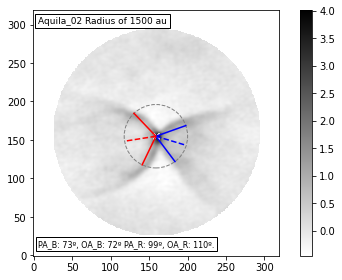

236.6643650311733 127.48076214436844
208.68210292008285 89.15424238969526
238.87226917795044 174.88386614229003


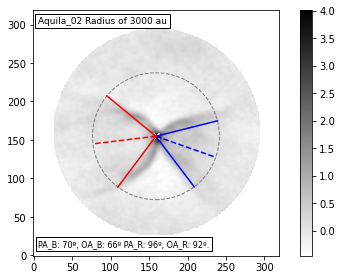

236.3734538852438 126.66827882338856
216.72141893904018 96.100820286866
240.9675053256083 162.71639514410793


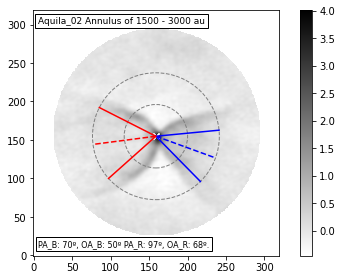

In [167]:
angle_vis(image_datab,image_datar,pa_blue,pa_red,op_angle_blue, op_angle_red,location,blue_direction,red_direction, source, arcs)

### Aquila_07

In [178]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_07_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_07_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

source=['Aquila_07','Aquila_07','Aquila_07']
location='18 29 47.02 -1 55 48.30'
distance_o=260
arcs=[1500,3000,3000]

pa_blue=[-8.4,-5.3,-5.3]
pa_red=[-6.7+180,-7.2+180,-7.3+180] #Added 180 from Gaussian fits values
op_angle_blue=[angle * 3.33 for angle in [-21.1, 15.4, 13.3]]
op_angle_red =[angle * 3.33 for angle in [22.3, 15.7, -11.4]]

blue_direction,red_direction=['west','east']

163.88125111161108 198.61349557375948
139.32740914976182 194.6517022108735
186.2420385062128 187.72395247815172


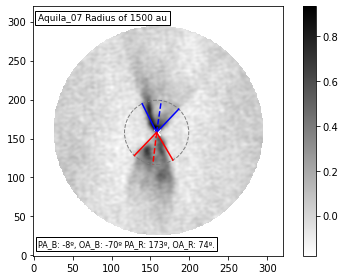

165.47416432094198 239.90831267987386
200.23352281388767 228.53343622235312
129.2155382570501 235.12157545877676


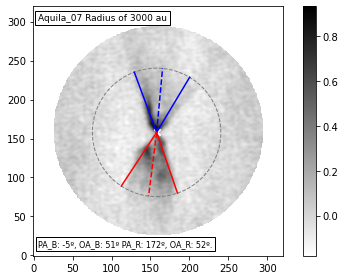

165.47416432094198 239.90831267987386
195.84386388335304 230.9860047820269
133.98144248960492 236.72480810329188


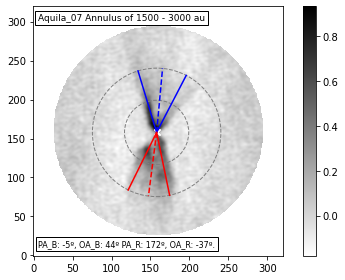

In [179]:
angle_vis(image_datab,image_datar,pa_blue,pa_red,op_angle_blue, op_angle_red,location,blue_direction,red_direction, source, arcs)

### Aquila_18

In [184]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_18_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_18_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

source=['Aquila_18','Aquila_18','Aquila_18']
location='18 32 13.24 -1 57 30.97'
distance_o=260
arcs=[1500,3000,3000]

pa_blue=[-22.9,-23.1,-22.5]
pa_red=[-28.8+180,-27.9+180,-27.6+180] #Added 180 from Gaussian fits values
op_angle_blue=[angle * 3.33 for angle in [15.1,14.3,12.2]]
op_angle_red =[angle * 3.33 for angle in [18.8,15.7,12.9]]

blue_direction,red_direction=['west','east']

161.04350091053877 191.02231603112034
175.65093276069507 180.61418341851032
143.39800850647046 194.23835203163472


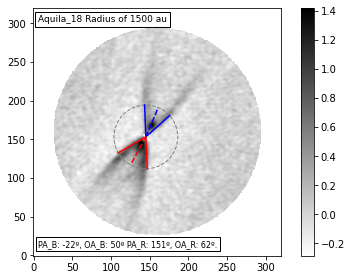

177.34219421729225 228.86746290744316
205.19177614515078 209.36353469639243
143.9891365163583 235.46867273720113


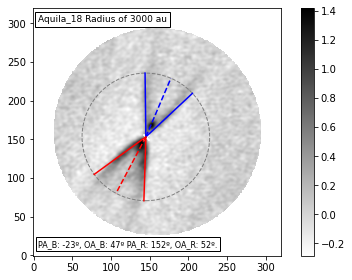

176.54663195672134 229.20188648802892
201.01623208993433 213.51890420252283
148.15446864629334 235.41496355183722


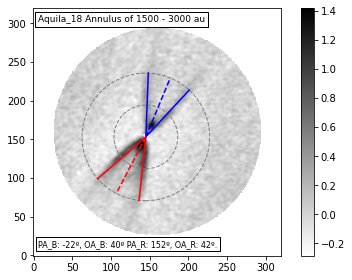

In [185]:
angle_vis(image_datab,image_datar,pa_blue,pa_red,op_angle_blue, op_angle_red,location,blue_direction,red_direction, source, arcs)

### Aquila_03

In [194]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_03_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_03_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

source=['Aquila_03','Aquila_03','Aquila_03']
location='18 29 37.62-1 50 59.55'
distance_o=260
arcs=[1500,3000,3000]

pa_blue=[-50.1,-51.5,-52.6]
pa_red=[-48.5+180,-51.4+180,-51.4+180] #Added 180 from Gaussian fits values
op_angle_blue=[angle * 3.33 for angle in [9.6,9.1,9.5]]
op_angle_red =[angle * 3.33 for angle in [13.6,12.7,12.7]]

blue_direction,red_direction=['west','east']

243.01091763933147 189.64354814927876
249.06706481994033 179.91696827933066
234.51051170158178 197.3264104761168


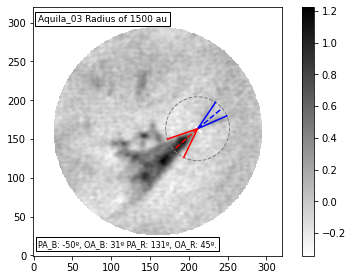

275.89470432223777 214.5141142631281
287.0615425806791 195.87359575859898
260.24393313927317 229.58795147156195


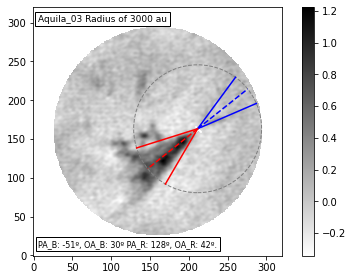

276.86767761460703 213.2665226496078
288.03214138392883 193.52636638210703
260.745302798652 229.21606969696018


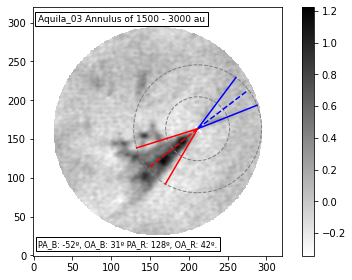

In [193]:
angle_vis(image_datab,image_datar,pa_blue,pa_red,op_angle_blue, op_angle_red,location,blue_direction,red_direction, source, arcs)

### Aquila_11

In [197]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_11_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_11_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

source=['Aquila_11','Aquila_11','Aquila_11']
location='18 30 17.47 -2 09 58.59'
distance_o=260
arcs=[1500,3000,3000]

pa_blue=[63.9,63.5,63.3]
pa_red=[60.3,57.8,55.2] #Added 180 from Gaussian fits values
op_angle_blue=[angle * 3.33 for angle in [-17.7,15.2,-10.6]]
op_angle_red =[angle * 3.33 for angle in [21.1,16.8,12.3]]

blue_direction,red_direction=['west','east']

189.51164347376056 137.65671462120793
193.64215319859932 158.20700429453402
175.80534762814546 121.79755416306656


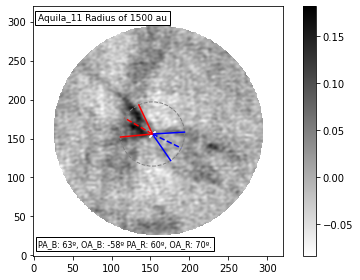

226.26005691899775 119.01319612905985
203.4624476030573 91.01470078900671
234.9007057471738 154.07009159425147


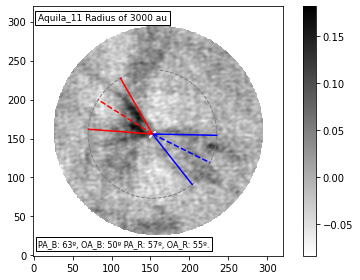

226.13125194459542 118.75597853880674
233.89242544802494 142.82021137274913
211.43947000010735 98.17747860970243


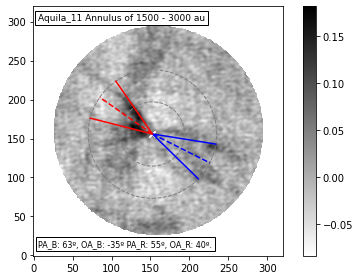

In [198]:
angle_vis(image_datab,image_datar,pa_blue,pa_red,op_angle_blue, op_angle_red,location,blue_direction,red_direction, source, arcs)

### Aquila_13

In [201]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_13_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_13_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

source=['Aquila_13','Aquila_13','Aquila_13']
location='18 30 25.88 -2 10 43.03'
distance_o=260
arcs=[1500,3000,3000]

pa_blue=[70.8,70.4,71.1]
pa_red=[78.8,79.4,78.0] #Added 180 from Gaussian fits values
op_angle_blue=[angle * 3.33 for angle in [14.5,12.2,11.7]]
op_angle_red =[angle * 3.33 for angle in [16.0,19.3,15.1]]

blue_direction,red_direction=['west','east']

190.3431439638152 139.09353053308237
181.3969981242303 124.36305963105757
192.48190730429667 156.1945828326321


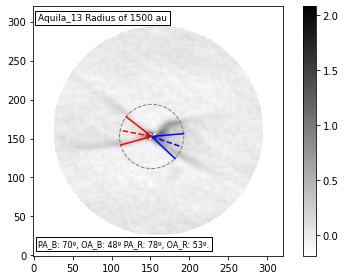

229.0651745922351 124.99987889410437
214.64026561856429 99.76816739551303
233.83385190652484 153.67001982014474


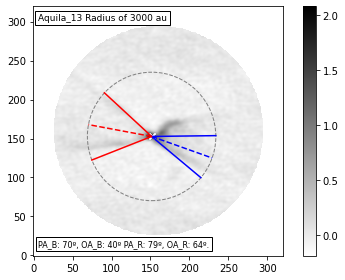

229.39711522294033 125.95041088333105
216.03178043765587 101.47757432992783
233.83600309674586 153.4794533173879


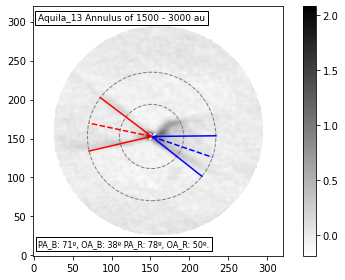

In [202]:
angle_vis(image_datab,image_datar,pa_blue,pa_red,op_angle_blue, op_angle_red,location,blue_direction,red_direction, source, arcs)